# [ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ≥º ÏùëÏö©] Í∏∞Îßê ÌîÑÎ°úÏ†ùÌä∏
## ÎìúÎùºÎßà ÏûêÏõê Ï∂îÏ≤ú ÏãúÏä§ÌÖú
### MBAÏ°∞ (Ïù¥ÏßÄÌù¨, ÍπÄÎÇòÏòÅ, Í∞ïÌïòÏó∞, Ïò§ÌòÑÏòÅ)

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import requests
import re
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import matplotlib 

## 1. Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞ 

In [2]:
df = pd.read_csv('./Drama_List_final.csv')
df[:5]

Unnamed: 0        Title_english  Rating  \
0           0       Move to Heaven     9.2   
1           1    Hospital Playlist     9.1   
2           2       Flower of Evil     9.1   
3           3  Hospital Playlist 2     9.1   
4           4            My Mister     9.1   

                                 Genre          Title_korean  \
0                  Life, Drama, Family  Î¨¥Î∏å Ìà¨ Ìó§Î∏ê: ÎÇòÎäî Ïú†ÌíàÏ†ïÎ¶¨ÏÇ¨ÏûÖÎãàÎã§   
1   Friendship, Romance, Life, Medical            Ïä¨Í∏∞Î°úÏö¥ ÏùòÏÇ¨ ÏÉùÌôú   
2  Thriller, Romance, Crime, Melodrama                  ÏïÖÏùò ÍΩÉ   
3   Friendship, Romance, Life, Medical           Ïä¨Í∏∞Î°úÏö¥ ÏùòÏÇ¨ÏÉùÌôú++   
4   Psychological, Life, Drama, Family                ÎÇòÏùò ÏïÑÏ†ÄÏî®   

                                            Synopsis  \
0  Han Geu Roo is a 20-year-old with Autism. He w...   
1  The stories of people going through their days...   
2  Although Baek Hee Sung is hiding a dark secret...   
3  Everyday is extraordinary for five doctors and...   
4  Park Dong Hoon is a middle-aged engineer who i...   

                                               Actor        Director  \
0  Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...     Kim Sung Ho   
1  Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...    Lee Woo Jung   
2  Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...    Yoo Jung Hee   
3  Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...    Lee Woo Jung   
4  Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...  Park Hae Young   

         Writer                                               Tags  \
0  Yoon Ji Ryun  Uncle-Nephew Relationship, Autism, Death, Sava...   
1   Shin Won Ho  Multiple Mains, Best Friends, Hospital, Slow R...   
2  Kim Chul Gyu  Married Couple, Deception, Family Secret, Susp...   
3   Shin Won Ho  Workplace, Strong Friendship, Best Friends, Mu...   
4   Kim Won Suk  Nice Male Lead, Strong Female Lead, Smart Fema...   

                                       Images  Watchers  
0  https://i.mydramalist.com/Rle36_4c.jpg?v=1     47482  
1  https://i.mydramalist.com/RXXL6_4c.jpg?v=1     68688  
2  https://i.mydramalist.com/WAEAp_4c.jpg?v=1     73946  
3  https://i.mydramalist.com/dKY0d_4c.jpg?v=1     34295  
4  https://i.mydramalist.com/2lb8k_4c.jpg?v=1     51608

In [3]:
# cleaned'ÎùºÎäî ÏÉàÎ°úÏö¥ Ïó¥Ïóê Ï†ÄÏû•

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df['cleaned'] = df['Synopsis'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

In [4]:
# NanÍ∞íÏúºÎ°ú Î∞îÍæ∏Ïñ¥
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df['cleaned'].notna()]
print('Ï†ÑÏ≤¥ Î¨∏ÏÑúÏùò Ïàò :',len(df))

Ï†ÑÏ≤¥ Î¨∏ÏÑúÏùò Ïàò : 694


In [5]:
#Î¨∏ÏÑúÎ≥Ñ Î≤àÌò∏ Îã§Ïãú Ï†ïÎ†¨
df = df.reset_index()
df[:5]

index  Unnamed: 0        Title_english  Rating  \
0      0           0       Move to Heaven     9.2   
1      1           1    Hospital Playlist     9.1   
2      2           2       Flower of Evil     9.1   
3      3           3  Hospital Playlist 2     9.1   
4      4           4            My Mister     9.1   

                                 Genre          Title_korean  \
0                  Life, Drama, Family  Î¨¥Î∏å Ìà¨ Ìó§Î∏ê: ÎÇòÎäî Ïú†ÌíàÏ†ïÎ¶¨ÏÇ¨ÏûÖÎãàÎã§   
1   Friendship, Romance, Life, Medical            Ïä¨Í∏∞Î°úÏö¥ ÏùòÏÇ¨ ÏÉùÌôú   
2  Thriller, Romance, Crime, Melodrama                  ÏïÖÏùò ÍΩÉ   
3   Friendship, Romance, Life, Medical           Ïä¨Í∏∞Î°úÏö¥ ÏùòÏÇ¨ÏÉùÌôú++   
4   Psychological, Life, Drama, Family                ÎÇòÏùò ÏïÑÏ†ÄÏî®   

                                            Synopsis  \
0  Han Geu Roo is a 20-year-old with Autism. He w...   
1  The stories of people going through their days...   
2  Although Baek Hee Sung is hiding a dark secret...   
3  Everyday is extraordinary for five doctors and...   
4  Park Dong Hoon is a middle-aged engineer who i...   

                                               Actor        Director  \
0  Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...     Kim Sung Ho   
1  Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...    Lee Woo Jung   
2  Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...    Yoo Jung Hee   
3  Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...    Lee Woo Jung   
4  Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...  Park Hae Young   

         Writer                                               Tags  \
0  Yoon Ji Ryun  Uncle-Nephew Relationship, Autism, Death, Sava...   
1   Shin Won Ho  Multiple Mains, Best Friends, Hospital, Slow R...   
2  Kim Chul Gyu  Married Couple, Deception, Family Secret, Susp...   
3   Shin Won Ho  Workplace, Strong Friendship, Best Friends, Mu...   
4   Kim Won Suk  Nice Male Lead, Strong Female Lead, Smart Fema...   

                                       Images  Watchers  \
0  https://i.mydramalist.com/Rle36_4c.jpg?v=1     47482   
1  https://i.mydramalist.com/RXXL6_4c.jpg?v=1     68688   
2  https://i.mydramalist.com/WAEAp_4c.jpg?v=1     73946   
3  https://i.mydramalist.com/dKY0d_4c.jpg?v=1     34295   
4  https://i.mydramalist.com/2lb8k_4c.jpg?v=1     51608   

                                             cleaned  
0  han geu roo year old autism works fathers busi...  
1  stories people going days seemingly ordinary a...  
2  although baek hee sung hiding dark secret surr...  
3  everyday extraordinary five doctors patients i...  
4  park dong hoon middle aged engineer married at...

In [6]:
# ÏàòÌñâ Í≤∞Í≥º ÌôïÏù∏
df['cleaned'][:5]

0    han geu roo year old autism works fathers busi...
1    stories people going days seemingly ordinary a...
2    although baek hee sung hiding dark secret surr...
3    everyday extraordinary five doctors patients i...
4    park dong hoon middle aged engineer married at...
Name: cleaned, dtype: object

In [7]:
# ÌÜ†ÌÅ∞ÌôîÎ•º ÏàòÌñâÌïòÏó¨ corpusÎùºÎäî Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Ìï®. corpusÎ°ú Word2VecÏùÑ ÌõàÎ†®Ìï† ÏòàÏ†ï

corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

## 2. ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú ÏõåÎìú ÏûÑÎ≤†Îî© Í∞ÄÏ†∏ÏôÄ ÏÇ¨Ïö©ÌïòÍ∏∞

In [8]:
# Ïù¥ Í≤ΩÏö∞Îäî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÏπò ÏïäÏïÑÏÑú Íµ¨Í∏ÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†Ïûê Ìï®
import gensim.downloader as api

word2vec_model = api.load('word2vec-google-news-300')

## 3. Îã®Ïñ¥ Î≤°ÌÑ∞Ïùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
- Í∞Å Î¨∏ÏÑúÏóê Ï°¥Ïû¨ÌïòÎäî Îã®Ïñ¥Îì§Ïùò Î≤°ÌÑ∞Í∞íÏùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏó¨ Ìï¥Îãπ Î¨∏ÏÑúÏùò Î≤°ÌÑ∞Í∞íÏùÑ Í≥ÑÏÇ∞

In [11]:
def get_document_vectors(document_list):
    document_embedding_list = []

    # Í∞Å Î¨∏ÏÑúÏóê ÎåÄÌï¥ÏÑú
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.index_to_key:
                count += 1
                # Ìï¥Îãπ Î¨∏ÏÑúÏóê ÏûàÎäî Î™®Îì† Îã®Ïñ¥Îì§Ïùò Î≤°ÌÑ∞Í∞íÏùÑ ÎçîÌï®
                if doc2vec is None:
                    doc2vec = word2vec_model[word]
                else:
                    doc2vec = doc2vec + word2vec_model[word]

        if doc2vec is not None:
            # Îã®Ïñ¥ Î≤°ÌÑ∞Î•º Î™®Îëê ÎçîÌïú Î≤°ÌÑ∞Ïùò Í∞íÏùÑ Î¨∏ÏÑú Í∏∏Ïù¥Î°ú ÎÇòÎà†Ï§å
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # Í∞Å Î¨∏ÏÑúÏóê ÎåÄÌïú Î¨∏ÏÑú Î≤°ÌÑ∞ Î¶¨Ïä§Ìä∏Î•º Î¶¨ÌÑ¥
    return document_embedding_list

In [12]:
document_embedding_list = get_document_vectors(df['cleaned'])
print(document_embedding_list)
print('Î¨∏ÏÑú Î≤°ÌÑ∞Ïùò Ïàò :',len(document_embedding_list))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 4. Ï∂îÏ≤ú ÏãúÏä§ÌÖú Íµ¨ÌòÑÌïòÍ∏∞
- ÏûÖÎ†•Ìïú ÎìúÎùºÎßàÏùò Ï§ÑÍ±∞Î¶¨ÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨Ìïú ÎìúÎùºÎßàÏùÑ Ï∂îÏ≤úÌïòÎäî Í≤ÉÏùÑ Î™©ÌëúÎ°ú Ìï®

In [13]:
# Í∞Å Î¨∏ÏÑú Î≤°ÌÑ∞ Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§Ïùò ÌÅ¨Í∏∞ :',cosine_similarities.shape)

ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§Ïùò ÌÅ¨Í∏∞ : (694, 694)


In [16]:
#ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
font_location = '/System/Library/Fonts/Supplemental/AppleGothic.ttf' # C:/Windows/Fonts/NanumGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
plt.rc('font', family = font_name)
plt.rc('font', size=15)

In [17]:
def recommendations(title):
    drama= df[['Title_korean', 'Images']]
    

    # Ï†úÎ™©ÏùÑ ÏûÖÎ†•ÌïòÎ©¥ Ìï¥Îãπ Ï†úÎ™©Ïùò Ïù∏Îç±Ïä§Î•º Î¶¨ÌÑ¥Î∞õÏïÑ idxÏóê Ï†ÄÏû•.
    indices = pd.Series(df.index, index = df['Title_korean']).drop_duplicates()    
    idx = indices[title]

    # ÏûÖÎ†•Îêú ÎìúÎùºÎßàÏôÄ Ï§ÑÍ±∞Î¶¨(document embedding)Í∞Ä Ïú†ÏÇ¨Ìïú 5Í∞ú ÏÑ†Ï†ï.
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    
    # Í∞ÄÏû• Ïú†ÏÇ¨Ìïú ÎìúÎùºÎßà 5Ìé∏Ïùò Ïù∏Îç±Ïä§
    drama_indices = [i[0] for i in sim_scores]

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Ìï¥Îãπ Ïù∏Îç±Ïä§Ïùò ÌñâÎßå Ï∂îÏ∂ú. 5Í∞úÏùò ÌñâÏùÑ Í∞ÄÏßÑÎã§.
    recommend = drama.iloc[drama_indices].reset_index(drop=True)
    fig = plt.figure(figsize=(20, 30))
    
    global recommend_list
    recommend_list = []
    for title in recommend['Title_korean']:
        recommend_list.append(str(title))
    
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°úÎ∂ÄÌÑ∞ ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•
    for index, row in recommend.iterrows():
        response = requests.get(row['Images'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index + 1)
        plt.imshow(img)
        plt.title(row['Title_korean'])

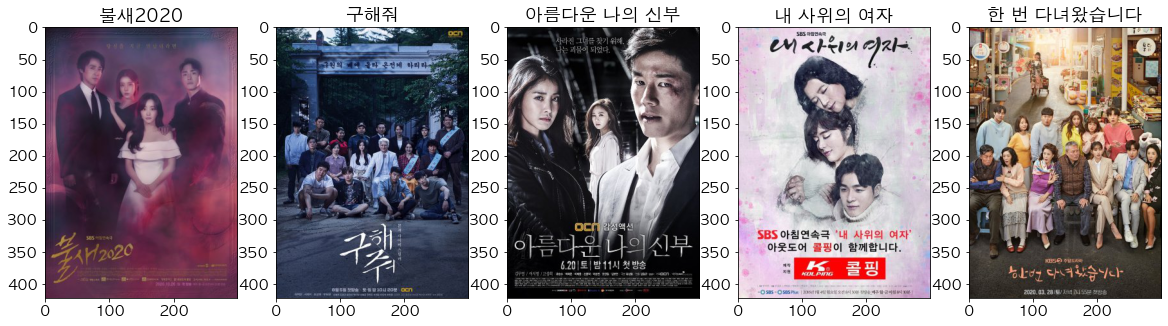

In [18]:
recommendations("ÎÇòÏùò ÏïÑÏ†ÄÏî®")

In [19]:
drama_info = df.loc[df['Title_korean'].isin(recommend_list)]
drama_info.iloc[:, 3:14]

Rating                                Genre Title_korean  \
66      8.6       Comedy, Romance, Drama, Family   Ìïú Î≤à Îã§ÎÖÄÏôîÏäµÎãàÎã§   
74      8.6     Action, Thriller, Mystery, Drama          Íµ¨Ìï¥Ï§ò   
305     7.9      Action, Mystery, Romance, Crime   ÏïÑÎ¶ÑÎã§Ïö¥ ÎÇòÏùò Ïã†Î∂Ä   
643     7.3    Romance, Drama, Family, Melodrama     ÎÇ¥ ÏÇ¨ÏúÑÏùò Ïó¨Ïûê   
682     6.6  Business, Romance, Drama, Melodrama       Î∂àÏÉà2020   

                                              Synopsis  \
66   "Once Again" is the story of the eventful Song...   
74   Following the failure of her father's business...   
305  Kim Do Hyung, who works as a bank executive an...   
643  Lee Jin Sook is a speaker on family happiness....   
682  Belonging to the wealthiest class and as the d...   

                                                 Actor       Director  \
66   Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...   Lee Jae Sang   
74   Seo Yea Ji, Ok Taec Yeon, Woo Do Hwan, Jo Sung...     Jung Yi Do   
305  Kim Mu Yeol, Lee Si Young, Go Sung Hee, Ryu Se...  Yoo Sung Yeol   
643  Seo Ha Joon, Yang  Jin Sung, Park Soon Chun, J...   Ahn Seo Jung   
682  Hong Soo Ah, Lee Jae Woo, Seo Ha Joon, Park Yo...   Lee Hyun Jik   

             Writer                                               Tags  \
66   Yang Hee Seung  Divorce, Multiple Couples, Multiple Mains, Mar...   
74     Kim Sung Soo  Cult, Adapted From A Webtoon, Church, Strong F...   
305    Kim Chul Gyu  Gangster Supporting Character, Police Officer ...   
643      Ahn Gil Ho  Single Father, Nice Female Lead, Soap Opera, P...   
682     Lee Yoo Jin  Disapproving Parent, Time Skip, Divorce, Famil...   

                                         Images  Watchers  \
66     https://i.mydramalist.com/kWPprc.jpg?v=1     10101   
74     https://i.mydramalist.com/jW1jdc.jpg?v=1     48822   
305    https://i.mydramalist.com/vobL2c.jpg?v=1      8020   
643    https://i.mydramalist.com/Q2XLWc.jpg?v=1       553   
682  https://i.mydramalist.com/ENyR0_4c.jpg?v=1      1061   

                                               cleaned  
66   once again story eventful song family cant get...  
74   following failure father s business sang mi fa...  
305  kim hyung works bank executive comes well to d...  
643  lee jin sook speaker family happiness however ...  
682  belonging wealthiest class daughter influentia...

In [20]:
print(recommend_list)

['Î∂àÏÉà2020', 'Íµ¨Ìï¥Ï§ò', 'ÏïÑÎ¶ÑÎã§Ïö¥ ÎÇòÏùò Ïã†Î∂Ä', 'ÎÇ¥ ÏÇ¨ÏúÑÏùò Ïó¨Ïûê', 'Ìïú Î≤à Îã§ÎÖÄÏôîÏäµÎãàÎã§']


In [21]:
drama_comment = []

# ÌäπÏ†ï ÌôòÍ≤ΩÏóêÏÑúÎßå ÏûëÎèô
def get_comment(drama_name):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    url = 'https://mydramalist.com'

    driver.get(url)
    driver.maximize_window()

    driver.implicitly_wait(3)
    inputElement = driver.find_element_by_class_name('form-control.p-x.b-a.rounded')
    #inputElement = driver.find_element_by_name('q')
    print(inputElement)
    inputElement.send_keys(drama_name)
    time.sleep(1)

    inputElement.submit()

    div = driver.find_element_by_class_name('text-primary.title')
 
    href = div.find_element_by_css_selector('a')


    href.click()

    driver.implicitly_wait(3)


    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        driver.implicitly_wait(3)

        new_height = driver.execute_script("return document.body.scrollHeight") 
        if new_height == last_height:
            break
        last_height = new_height

        try:
            moreButton = driver.find_element_by_css_selector('button.el-button.btn.btn-block.btn-default.el-button--default')
            print(moreButton)

            driver.execute_script("arguments[0].send_keys();", moreButton)
            #moreButton.click()
            driver.implicitly_wait(3)
        except:
            break
            


    #print('LOAD POST MESSAGE')
    postLists = driver.find_elements_by_xpath("//div[@class='post-message']")
    print(postLists)
   
    for postTag in postLists:
        try:
            postMessage = postTag.find_element_by_css_selector('p')
            print(postMessage.text)
            drama_comment.append(postMessage.text)
        except:
            pass
    return drama_comment

Î™á Î≤àÏß∏ ÎìúÎùºÎßàÏùò ÏÜçÏÑ±ÏùÑ ÌôïÏù∏ÌïòÏãúÍ≤†ÏäµÎãàÍπå?1




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST chromedriver version for 102.0.5005 google-chrome
Driver [/Users/hayeon/.wdm/drivers/chromedriver/mac64/102.0.5005.61/chromedriver] found in cache


<selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="b60d21be-35e3-47d6-b384-08312db2dc76")>
[<selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="cb029b4c-2b9b-4bc8-af1e-43d327451220")>, <selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="124c40c2-b837-4f41-bf3f-92e529b27067")>, <selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="53c19f24-a2dd-4829-afe1-8baa3c76a016")>, <selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="8dd0ee8e-f188-41d9-8d79-2b3ee0782a00")>, <selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="76c795fa-bc6a-404b-8946-f239b833fe77")>, <selenium.webdriver.remote.webelement.WebElement (session="4a04ab2dd7bb0716ff4205f8b21ae230", element="5e212e13-4557-49ea-a9cf-38243b563

<ipython-input-62-1388d65488a0>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_comment['comment'] = df_comment['comment'].str.replace('[^a-zA-Z]',' ')


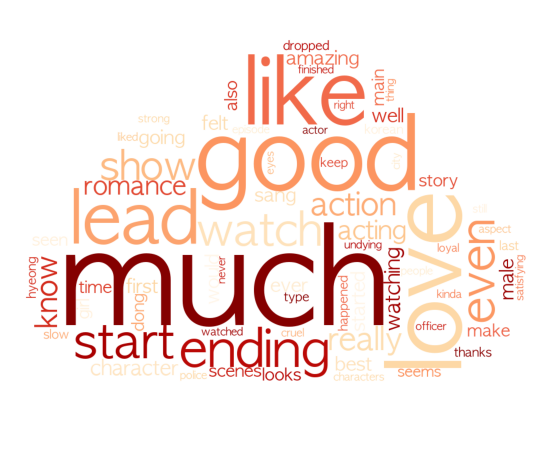

In [62]:
number = int(input("Î™á Î≤àÏß∏ ÎìúÎùºÎßàÏùò ÏÜçÏÑ±ÏùÑ ÌôïÏù∏ÌïòÏãúÍ≤†ÏäµÎãàÍπå?"))
# ÌäπÏ†ï ÌôòÍ≤ΩÏóêÏÑúÎßå ÏûëÎèô

comment_list = get_comment(recommend_list[number])
df_comment = pd.DataFrame(data = [[(','.join(comment_list))]], columns=['comment'])
print(df_comment)

df_comment['comment'] = df_comment['comment'].str.replace('[^a-zA-Z]',' ') 
df_comment['comment'] = df_comment['comment'].str.lower()

comment =  df_comment['comment'].to_list()

stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(comment[0])
result = []
       

# ps = PorterStemmer()
for w in word_tokens:
# w = ps.stem(w)
    if w not in stop_words: 
        result.append(w) 
print(len(result))

comment = []
for i in range(len(result)):
    if not 'drama' in result[i]:
        comment.append(result[i])

# ÏÑ∏ Í∏ÄÏûê Ïù¥ÌïòÏùò Îã®Ïñ¥ Ï†úÍ±∞
comment_result = []
for s in comment:
    if len(s) > 3:
        comment_result.append(s)

print(comment_result)

counts = Counter(comment_result)
tags = counts.most_common(70)
tags

wordcloud = WordCloud(font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
                 background_color = 'black', width = 1000, height = 500)
print(dict(tags))

cloud_mask = np.array(Image.open("/Users/hayeon/Downloads/cloud.png")) # C:\\Users\\User\\Documents\\Ïπ¥Ïπ¥Ïò§ÌÜ° Î∞õÏùÄ ÌååÏùº\\cloud.png
wordcloud = WordCloud(font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
                 background_color = 'white', width=900, height = 800, colormap='OrRd', mask=cloud_mask)
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize = (10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## Î∞∞Ïö∞Î™ÖÍ≥º ÌïòÌä∏ Ïàò ÌÅ¨Î°§ÎßÅ

In [63]:
Name = []
Hearts = []

In [64]:
pre ='https://mydramalist.com/search?adv=people&na=3&so=popular&page='

#site_pre = 'https://mydramalist.com/search?adv=people&na=3&so=popular&page='
Actor = []
Hearts = []
for i in range(1,250) :
    site = pre + str(i)
    res = requests.get(site)
    soup = BeautifulSoup(res.content)
    
    data_name = soup.find_all("h6","text-primary title")
    for a in data_name:
        Actor.append(a.get_text().strip())
        
    counts_hearts = soup.find_all("span","like-cntb")    
    for b in counts_hearts:
        Hearts.append(b.get_text().strip())
   
    

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file /Users/hayeon/opt/anaconda3/lib/python3.8/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [65]:
df_actor = pd.DataFrame({'Î∞∞Ïö∞Î™Ö' : Actor, 'ÌïòÌä∏ Ïàò': Hearts })
df_actor[:5]

Î∞∞Ïö∞Î™Ö    ÌïòÌä∏ Ïàò
0     Lee Min Ho  12,848
1   Lee Jong Suk  18,588
2  Park Shin Hye  10,038
3  Ji Chang Wook  14,940
4  Song Joong Ki  12,835

In [66]:
#csvÌååÏùºÎ°ú Ï†ÄÏû•
df_actor.to_csv('Actor.csv')

## ÎìúÎùºÎßà Ï∂úÏó∞ÏßÑ Î¶¨Ïä§Ìä∏ Î∞õÍ∏∞
- Í∞Å Î∞∞Ïö∞Î™ÖÏùÑ ÏπºÎüºÌôîÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î∞õÍ∏∞

In [67]:
def get_Actorlist(DramaName):
    drama = df.loc[(df['Title_korean'] == DramaName)]
    target = drama['Actor']
    Actor_dummy = drama['Actor'].str.get_dummies(sep = ', ')
    TargetActors = Actor_dummy.columns
    return TargetActors

In [68]:
#ÎìúÎùºÎßà Ï†úÎ™© ÏûÖÎ†•
Actorlist = get_Actorlist(recommend_list[number])
Actorlist

Index(['Bae Gi Beom', 'Choi Hyuk Joo', 'Choi Moon Soo', 'David Lee', 'Go Jun',
       'Ha Hoe Jung', 'Jang Hyuk Jin', 'Jang Won', 'Jang Yoo Sang',
       'Jeon Yeo Been', 'Jo Jae Yoon', 'Jo Sung Ha', 'Jung Hae Kyun',
       'Jung Jae Kwang', 'Jung Ji Ho', 'Jung Joon Won ', 'Kang Deok Joong',
       'Kang Kyung Hun', 'Kim Kwang Gyu', 'Lee  Jae Joon', 'Lee In Chul',
       'Lee Jung Hun', 'Lee Kyung Hoon', 'Lee Seung Hyub', 'Lee Tae Hyung',
       'Min Kyung Ok', 'Ok Taec Yeon', 'Park Ji Young', 'Park Soo Yeon',
       'Seo Yea Ji', 'Son Byung Ho', 'Son Byung Wook', 'Son Sang Kyung',
       'Woo Do Hwan', 'Yoon Jong Seok', 'Yoon Yoo Sun'],
      dtype='object')

# Î∞∞Ïö∞Î≥Ñ Ïù∏Í∏∞Î•º ÌôïÏù∏ÌïòÎäî Í∑∏ÎûòÌîÑ

In [69]:
df_actor = pd.read_csv('Actor.csv')

In [70]:
#Í∑∏ÎûòÌîÑÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ ÌïòÌä∏ ÏàòÎ•º Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôòÌï®
df_actor['ÌïòÌä∏ Ïàò'] = df_actor['ÌïòÌä∏ Ïàò'].str.replace(',','').astype('int')

                  Î∞∞Ïö∞Î™Ö  ÌïòÌä∏ Ïàò  Unnamed: 0
159        Seo Yea Ji  5022       159.0
500       Woo Do Hwan  4713       500.0
65       Ok Taec Yeon  4300        65.0
4757    Jeon Yeo Been  1219      4757.0
471         David Lee   491       471.0
667       Jo Jae Yoon   463       667.0
367     Lee  Jae Joon   398       367.0
2204           Go Jun   328      2204.0
792     Kim Kwang Gyu   303       792.0
2256   Lee Seung Hyub   283      2256.0
695        Jo Sung Ha   219       695.0
576     Jang Yoo Sang   183       576.0
658     Park Ji Young   182       658.0
819      Yoon Yoo Sun   167       819.0
4929   Yoon Jong Seok   155      4929.0
1850    Jang Hyuk Jin   126      1850.0
1365    Jung Hae Kyun    97      1365.0
1667     Son Byung Ho    42      1667.0
4624      Ha Hoe Jung    17      4624.0
2114   Kang Kyung Hun    10      2114.0
3044    Choi Moon Soo     7      3044.0
4156  Kang Deok Joong     4      4156.0
3267   Son Byung Wook     4      3267.0
3968   Son Sang Kyung     4 

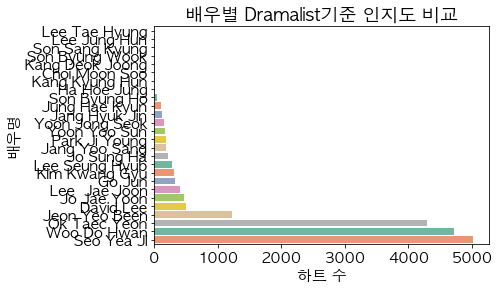

In [72]:
df_target = pd.DataFrame(columns = ['Î∞∞Ïö∞Î™Ö', 'ÌïòÌä∏ Ïàò'])

for i in range(len(Actorlist)):
    df_2=df_actor.loc[(df_actor['Î∞∞Ïö∞Î™Ö'] == Actorlist[i])]
    df_target=df_target.append(df_2)

print(df_target.sort_values('ÌïòÌä∏ Ïàò', ascending = False))

sns.barplot(data=df_target, x=df_target.sort_values('ÌïòÌä∏ Ïàò')['ÌïòÌä∏ Ïàò'], y=df_target.sort_values('ÌïòÌä∏ Ïàò')['Î∞∞Ïö∞Î™Ö'], palette='Set2')
plt.title('Î∞∞Ïö∞Î≥Ñ DramalistÍ∏∞Ï§Ä Ïù∏ÏßÄÎèÑ ÎπÑÍµê')
plt.show()